In [1]:
# Importing all necessary libraries to work with the dataset

# Panda library is used to get a dataframe with rows and columns out of the dataset
import pandas as pd
# Seaborn library is used to provide an interface to generate statiscal visualization
import seaborn as sns; sns.set()
# Matplotlib library is used to plot all types 2D graphs in python
import matplotlib.pyplot as plt
# Numpy library is used to handle mathematical and numerical functions
import numpy as np
# We have used PCA to reduce the dimension of the dataset 
from sklearn.decomposition import PCA
# Train_test_split package is used to split the training and testing data from the dataset
from sklearn.model_selection import train_test_split
# Importing the classifier that we will be working
from sklearn.ensemble import RandomForestClassifier
# This package is used to obtain the accuracy of the classifier 
from sklearn.metrics import accuracy_score
# Cross validation library helps to get the accuracy of the cross validation set
from sklearn.cross_validation import  cross_val_score
# Confusion matrix is used to get the statistics between the true and predicted labels
from sklearn.metrics import confusion_matrix
# This package is used to generate the classification report
from sklearn import metrics

# In order to plot the tree we need to add these two lines to the PATH
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# We are importing essential packages to visualize the decision trees.
from sklearn.tree import export_graphviz
import pydot

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Reading the Phishing websites data from the excel file and saving them to a variable 'features'
features = pd.read_excel('dataset.xlsx')
# Displaying the first 5 rows of the dataset
features.head(5)

,SFH,popUp Window,SSL Final State,Request URL,URL of Anchor,Web Traffic,URL Length,Age of Domain,Having IP Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
# X variable contains all data without the Result column.Axis 1 refers to the columns
X= features.drop('Result', axis = 1)
# Y variable contains only the Result column of the dataset
Y= features.loc[:,['Result']].values
# Converting Y into 1D array
Y= Y.ravel()
# Saving the column headings(feature names)
feature_list = list(X.columns)
target_list =['Phishing', 'Suspicious', 'Legitimate']
print(feature_list)


[u'SFH', u'popUp Window', u'SSL Final State', u'Request URL', u'URL of Anchor', u'Web Traffic', u'URL Length ', u'Age of Domain', u'Having IP Address']


In [4]:
# Choose the minimum number of principal components so that 95% of variance is maintained
pca = PCA(0.95)
# Fitting the features data and applying transform
principalComponents = pca.fit_transform(X)
# Framing the number of components into a data frame
pcaDf = pd.DataFrame(data = principalComponents)
# Adding the result column
finalDf = pd.concat([pcaDf, features[['Result']]], axis = 1)
# Viewing the first 5 rows of the final dataframe
finalDf.head(5)

,0,1,2,3,4,5,6,7,Result
0,-0.040007,-0.534025,1.396626,0.657558,0.070759,0.410673,-1.317227,1.134072,0
1,1.126874,-1.694566,-0.602241,1.499749,0.151729,-0.102142,-0.358969,0.431160,1
2,-0.048551,-0.771857,0.049534,-1.083485,0.707807,-0.547327,-1.039926,0.308606,1
3,-0.655722,-0.809362,1.487724,0.779619,0.072811,-0.126211,-0.400537,0.517497,0
4,0.462426,-1.250212,-0.285455,-0.897072,-0.932769,1.017973,0.058857,0.286242,1


In [5]:
# Splitting the dataset into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [6]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (1014, 9))
('Training Labels Shape:', (1014L,))
('Testing Features Shape:', (339, 9))
('Testing Labels Shape:', (339L,))


In [7]:
# Using the RandomForestClassifier model with 1000 decision trees
RFC = RandomForestClassifier(n_estimators=1000)
# Training the classifier on training data
RFC.fit(train_features, train_labels);
# Predicting the classifier with the test data
predictions = RFC.predict(test_features)

In [8]:
# Finding the accuracy of the predicted data compared to the test values
accuracy = 100.0 * accuracy_score(test_labels, predictions)
print ("The accuracy of your algorithm on testing data is: " + str(accuracy))

The accuracy of your algorithm on testing data is: 89.97050147492625


In [9]:
# Calculating the cross validation score of the dataset using the 10 fold cross validation
scores = cross_val_score(RFC, X, Y,cv=10)
print("10-fold cross validation average accuracy: " + str(scores.mean()*100.0) )

10-fold cross validation average accuracy: 89.8115861226286


In [10]:
# Generating classification report for the predictions
print(metrics.classification_report(predictions, test_labels,target_names=target_list))

             precision    recall  f1-score   support

   Phishing       0.92      0.91      0.91       170
 Suspicious       0.84      0.87      0.85        30
 Legitimate       0.89      0.89      0.89       139

avg / total       0.90      0.90      0.90       339



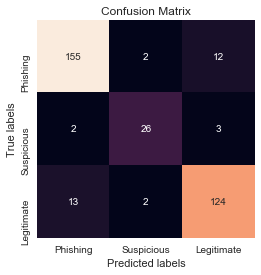

In [11]:
# Finding the values for the confusion matrix by comparing the predicted values with the test values
confusionMatrix = confusion_matrix(test_labels, predictions)
subGraph= plt.subplot()
# Generating a map to visualize the matrix
sns.heatmap(confusionMatrix, square=True, annot=True, fmt='d', cbar=False, ax=subGraph); #annot=True to annotate cells

# Setting the labels for X and Y axis
subGraph.set_xlabel('Predicted labels');
subGraph.set_ylabel('True labels'); 
# Setting title
subGraph.set_title('Confusion Matrix'); 
# Setting the class labels for both axis
subGraph.xaxis.set_ticklabels(['Phishing', 'Suspicious','Legitimate']);
subGraph.yaxis.set_ticklabels(['Phishing', 'Suspicious','Legitimate']);

In [12]:
# From the forest we are going to take one tree
oneTree = RFC.estimators_[5]
# We are exporting the decision tree to a dot file
export_graphviz(oneTree, out_file = 'oneTree.dot', feature_names = feature_list, rounded = True, precision = 1)
# With the help of the dot file we are generating the graph
(graph, ) = pydot.graph_from_dot_file('oneTree.dot')
# To view the image, we are converting the dot file to png format
graph.write_png('oneTree.png')


In [13]:
# Limiting the depth of the single tree to 3 levels
RFC_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
RFC_small.fit(train_features, train_labels)
# Extracting the small tree
decisionTree_small = RFC_small.estimators_[5]
# Saving the tree to png format
export_graphviz(decisionTree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');